# El método de Box-Müller, Marsaglia y el cociente de uniformes

## Método de Box-Müller
El método de Box-Müller nos permite simular un par de variables aleatorias que se distribuyen $N(0,1)$ y que son independientes. Primero se presenta la siguiente justificación. Sean $X$ y $Y$ variables aleatorias independientes que se distribuyen normal estándar, $(X,Y)$ nos representa un vector aleatorio que en su forma polar es $(\theta, R)$, se puede verificar que $\theta \sim U(0,2 \pi)$ y $R$ tiene la distribución de Rayleigh (la distribución de la raíz cuadrada de una v.a. exponencial de parámetro 1, además ambas son independientes. De la transformación de coordenadas tenemos que\
$X = R \cdot \cos(\theta)$ \
$Y = R \cdot \sin(\theta)$\
$\theta$ y $R$ son fáciles de simular, ya que si $U_1$ y $U_2$ son variables aleatorias independientes que se distribuyen uniforme en $(0,1)$, entonces $\theta = 2 \pi U_1 \sim U(0,2 \pi)$ , y además $V = -2 \ln(U_2) \sim exp(1)$, por lo tanto $R$ se distribuye como $\sqrt{V}$. Con esto obtenemos el siguiente algoritmo que se le conoce como método de Box-Müller.
1. Genera $U_1$ y $U_2$ variables aleatorias uniformes en $(0,1)$.
2. Regresa las variables aleatorias normales estándar e independientes definidas como:\
   $X =  \sqrt{-2 \ln(U_2)} \cdot \cos(2 \pi U_1)$ \
   $Y = \sqrt{-2 \ln(U_2)} \cdot \sin(2 \pi U_1)$

   
Simulamos el algoritmo con el siguiente programa, simularemos una v.a. normal estándar llamada $Z$.


In [1]:
set.seed(10) 
#generamos un total de 500 uniformes, repartidas en U1 y U2
U1 <- runif(250) 
U2 <- runif(250) 

theta <- 2*pi*U1 #Esta theta (muestras de la v.a. theta) es la misma que la teorica vista en clase
R <- sqrt(-2*log(U2, base=exp(1))) #Esta R (muestras de la v.a. R) es la misma que la teorica vista en clase

#Por el teorema demostrado en clase sabemos que X y Y se distribuyen N(0,1) y son independientes
X <- R * cos(theta) 
Y <- R * sin(theta)
Z <- c(X,Y) #Juntamos X y Y para tener un total de 500 muestras

In [2]:
Z[1:10] #imprimimos algunos ejemplos de la muestra

[1] -1.84943236 -0.18035833 -0.90865811 -0.61104853  1.69378010  0.09777799
 [7] -0.22006502 -0.17881319 -1.55692944 -0.54883332

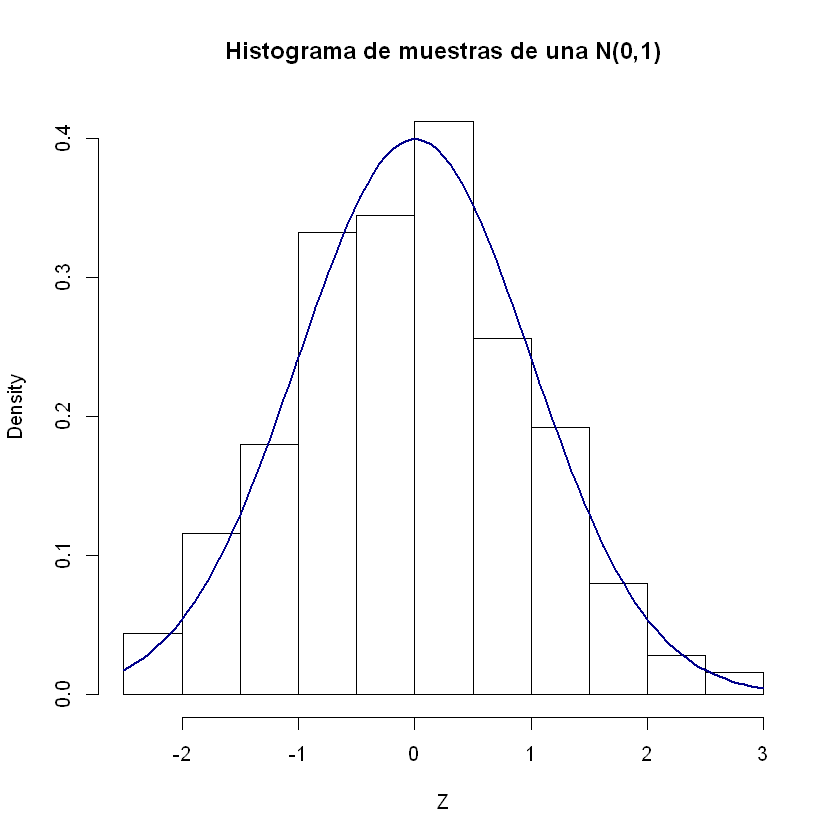

In [3]:
hist(Z, freq=F,
     main = "Histograma de muestras de una N(0,1)",
      xlab = "Z",)
curve(dnorm(x),  col="darkblue",
      lwd=2, add=TRUE, yaxt="n")

Notamos que si queremos simular una v.a. que se distribuye $N(\mu, \sigma^2)$ basta hacer la transformación $\sigma Z + \mu$.

Calculamos $\mathbb{P}(Z <2)$

In [4]:
proba <- sum(Z < 2)/500 #Sumamos los valores de nuestra muestra que son menores que 2 y dividimos entre el total 
proba

[1] 0.978

En la tabla normal vemos lo siguiente:
<img src="normal2.jpg">

Por lo tanto, lo obtenido en la simulación es una buena aproximación.


## Método de Marsaglia

## Método de Cociente de uniformes

La gráfica de la región S obtenida analiticamente luce como la figura azúl.

<img src="s.jpg">

In [7]:
set.seed(1)
X <- c() #Creamos un vector donde meteremos las muestras

#Creamos un loop while que se detiene cuando el total de muestras es 500
while(length(X)<500) {
    #Generamos una uniforme en el cuadrado naranja mostrado en la figura
    u = runif(1, 0, 2/sqrt(3)) 
    v = runif(1, -2/sqrt(3),2/sqrt(3))

    #Seleccionamos los puntos que caen la region que definimos como S
    #De esta forma creamos una uniforme en S
    #Un punto cae en S en cualquiera de los siguientes casos
    #Si el punto no cae en S el programa nunca entra al if
    #y el ciclo se vuelve a repetir
    #Hacemos esto hasta que el total de muestras sean 500
    if(sqrt(3)*u^2+u < v & v <= 2*u){
        X <- c(X,v/u) #En este caso el punto cae en S y lo agregamos al vector de muestras
    } else if(-u <= v & v < u-sqrt(3)*u^2){
        X <- c(X,v/u) #En este caso el punto cae en S y lo agregamos al vector de muestras
    } 
}


In [7]:
head(X) #Imprimimos algunos ejemplos de la muestra

[1] -0.9632537 -0.8523735 -0.9872493  0.1178371 -0.7302019 -0.7435680

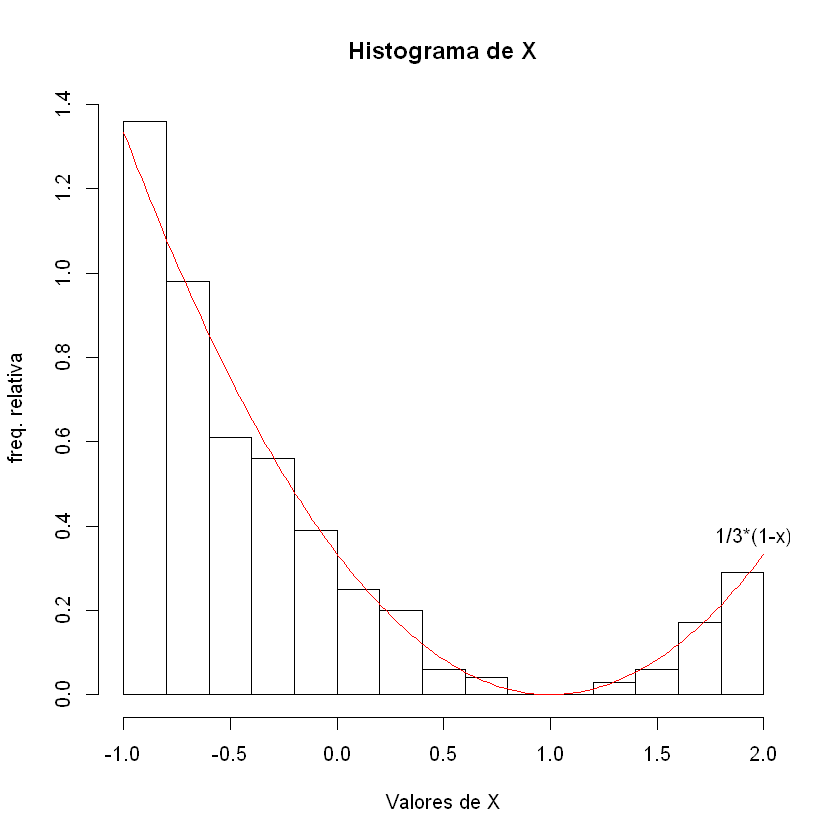

In [8]:
hist(X, freq=F,breaks=15, #creamos el histograma con las muestras X
    main="Histograma de X",
    xlab="Valores de X",
    ylab="freq. relativa")
x <- seq(-1,2,length.out=150)

lines(x=x,y=1/3*(1-x)^2, col = "red") #Creamos la grafica de h(x) en (-1,2)
text(c(2.4,0.375), labels = c("1/3*(1-x)^2"))